[View in Colaboratory](https://colab.research.google.com/github/humandotlearning/hand-written-numbers-recognition-application/blob/master/mnist_pytorch_nn.ipynb)

In [63]:
%autosave 0

Autosave disabled


In [64]:
!pip install torch

In [65]:
!pip install torchvision

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [0]:
train_dataset= dsets.MNIST(root='./MNIST',train=True, transform=transforms.ToTensor(),download=True)
test_dataset= dsets.MNIST(root='./MNIST', train=False, transform=transforms.ToTensor(), download=True)

In [68]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [0]:
def show(i=0,train_set=True):
    if train_set:
        plt.imshow(train_dataset[i][0].view(28,28), cmap='gray')
        plt.title(train_dataset[i][1])
    else:
        plt.imshow(test_dataset[i][0].view(28,28), cmap='gray')
        plt.title(test_dataset[i][1])

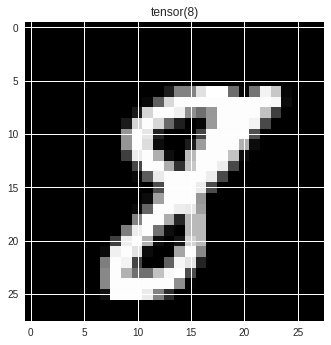

In [70]:
show(55)

In [0]:
batch_size=100
n_iters=3000
num_epochs= int(n_iters/(len(train_dataset)/batch_size))

In [72]:
num_epochs

5

In [0]:
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

In [0]:
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [0]:
class neuralnet(nn.Module):
    def __init__(self,in_dim,h1,h2,out_dim):
        super(neuralnet,self).__init__()
        self.net=nn.Sequential(
          nn.Linear(in_dim,h1),
          nn.Dropout(0.5),
          nn.ReLU(),
          nn.Linear(h1,h2),
          nn.Dropout(0.5),
          nn.ReLU(),
          nn.Linear(h2,out_dim),
        )
    def forward(self,x):
        x=self.net(x)
        return x

In [0]:
in_dim=28*28
h1=150
h2=100
out_dim= 10

In [0]:
model= neuralnet(in_dim,h1,h2,out_dim).cuda()

In [0]:
criterion=nn.CrossEntropyLoss()

In [0]:
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [105]:
%%time
iter=0
for epoch in range(num_epochs):
    epoch=epoch+1
    for i, (images,labels) in enumerate(train_loader):
        #labels=labels.type(torch.LongTensor)
        images=Variable(images.view(-1,28*28).cuda())
        labels=Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs= model(images)
        
        loss=criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        iter+=1
        
        if iter % 500 ==0:
            correct=0
            total=0
        
            for images,labels in test_loader:
                images=Variable(images.view(-1,28*28).cuda())
                
                outputs=model(images)
                
                _,predicted= torch.max(outputs.data,1)
                total += labels.size(0)
                correct += (predicted.cpu()==labels.cpu()).sum()

            accuracy=100 * correct/total
            print(f"iterations: {iter} , loss: {loss.data[0]}, accuracy: {accuracy}")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


iterations: 500 , loss: 0.2901875972747803, accuracy: 90
iterations: 1000 , loss: 0.27826201915740967, accuracy: 89
iterations: 1500 , loss: 0.2793291211128235, accuracy: 90
iterations: 2000 , loss: 0.29497185349464417, accuracy: 90
iterations: 2500 , loss: 0.2723633646965027, accuracy: 90
iterations: 3000 , loss: 0.2443697601556778, accuracy: 91
CPU times: user 37 s, sys: 4.56 s, total: 41.5 s
Wall time: 41.5 s


In [0]:
_,predicted= torch.max(outputs.data,1)


In [82]:
predicted

tensor([ 8,  9,  0,  1,  2,  7,  4,  5,  6,  7,  8,  0,  1,  2,
         3,  4,  7,  8,  9,  7,  8,  6,  4,  1,  9,  3,  8,  4,
         4,  7,  0,  1,  9,  2,  8,  7,  8,  2,  6,  0,  0,  6,
         3,  3,  9,  9,  1,  4,  0,  6,  1,  0,  0,  0,  2,  1,
         1,  7,  7,  3,  4,  6,  0,  7,  0,  3,  6,  8,  7,  1,
         3,  2,  4,  9,  4,  2,  6,  4,  1,  7,  3,  6,  2,  0,
         1,  2,  3,  4,  5,  6,  7,  8,  9,  0,  1,  2,  3,  4,
         5,  6], device='cuda:0')

In [91]:
outputs.data[0]

tensor([-2.3237,  1.1712,  1.3614,  0.8723, -2.2406,  2.5664,  0.0207,
        -4.0707,  5.2034, -1.4964], device='cuda:0')

In [83]:
labels

tensor([ 8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,
         3,  4,  7,  8,  9,  7,  8,  6,  4,  1,  9,  3,  8,  4,
         4,  7,  0,  1,  9,  2,  8,  7,  8,  2,  6,  0,  6,  5,
         3,  3,  3,  9,  1,  4,  0,  6,  1,  0,  0,  6,  2,  1,
         1,  7,  7,  8,  4,  6,  0,  7,  0,  3,  6,  8,  7,  1,
         5,  2,  4,  9,  4,  3,  6,  4,  1,  7,  2,  6,  5,  0,
         1,  2,  3,  4,  5,  6,  7,  8,  9,  0,  1,  2,  3,  4,
         5,  6])

In [85]:
torch.save(model,'./model.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type neuralnet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
model1=torch.load('./model.pt')

In [0]:
x=model1(images)

In [90]:
x.data[0]

tensor([-2.3237,  1.1712,  1.3614,  0.8723, -2.2406,  2.5664,  0.0207,
        -4.0707,  5.2034, -1.4964], device='cuda:0')